# PHY1024 - Introduction to Python Programming, week 3

The lecture materials, worksheets, and assignments can all be found here:

http://go.qub.ac.uk/phy1024y2016


## Lecture materials

Note: the computer labs sessions are mandatory also in weeks where there is no new assignment. Attendance sheets will be provided for the computer labs which need to be signed by each student either on a Thursday session or a Friday session.

### Monte Carlo simulations

Now that we know how to produce random numbers with the help of a computer, we might as well do something useful with it.

Monte Carlo simulations are computational algorithms that use random numbers ("random sampling") to get a numerical result.

How does this work?

Step 1: Define what the range of possible inputs is

Step 2: Produce a random sampling of the possible input numbers

Step 3: Perform the calculation describing the physical problem, using the random numbers from Step 2 as input data

Step 4: Evaluate the result (look at the output numbers).

When we have done all this, we have successfully simulated a physical problem using the Monte Carlo method.

#### Example: Rolling 2 dice

Let's say we roll 2 dice and what to figure out how likely it is that we roll a total of 11 or more eyes. We *could* figure this out without a simulation: we could roll 6 and 6 , or 5 and 6... but do we also have to count 6 and 5? Hmm....

So let's say we do this brute force with a simulation.

Step 1: possible input range: 1, 2, 3, 4, 5, 6 for each die.

Step 2: Make a random sample of those input values. Specifically, let's say we make 10000 random numbers for each die, going from 1 to 6.

In [2]:
import numpy as np

np.random.seed(1234)

die_1 = np.random.random_integers(1, 6, 10000) # this draws random integers from a uniform distribution

die_2 = np.random.random_integers(1, 6, 10000)


Step 3: Make the calculation, i.e. in this case the sum of the eyes shown by the two dice.

In [3]:
result = die_1 + die_2

Step 4: evaluate the results. This means we want to see how many of our 1000 random results have a value of 11 or more (specifically, 11 or 12 because 12 is the maximum we can roll with 2 dice).

Python has a really convenient way for doing this, namely with a concept called *masks*.

#### Masks in python

We can have python compare the elements of an array to a condition, and the result is called a **mask**. The mask is either True or False for each element:

In [4]:
mymask = result >= 11

print mymask[0:50]

[False False False  True False False False False False False  True False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False  True
 False  True]


So, if an element fulfills our condition, the mask has a value "True", otherwise the mask value is "false". 

And now we can use another very neat python construct. Python internally treats "True" as a "1", and "False" as a "0". Python also allows us to sum up all elements in an array by writing ".sum()" at the end of an array. So if we sum up all the elements in the mask, we get the number of True elements:


In [5]:
print mymask.sum()

820


And this is how many elements we have in total:

In [6]:
print len(result)

10000


Now we can calculate what fraction of all our result produced "True" when we asked for results with a value of 11 or larger.

In [7]:
print np.float(mymask.sum())/np.float(len(result))

0.082


We use the np.float() around the numbers because otherwise they would be integers, and we remember that dividing a smaller integer by a larger integer in python would just give us a zero instead of a fraction.

In [8]:
# this is what we should not do:
print mymask.sum()/len(result)

0


So our result is 0.082! Does that make sense? Let's do the mental exercise in any case: There are 36 different ordered pairs of 2 numbers we can roll, 3 out of those have a value of 11 or more (6+6, 5+6, 6+5), so we expect a fracyio of 3/36 = 1/12. This is numerically:

In [9]:
print 1./12.

0.0833333333333


So our Monte Carlo simulation which yielded 0.082 did quite well!

#### Repeating pseudo-random experiments and the concept of a "seed"

Exactly how well did we do with our Monte Carlo simulation? Obviously, we're reasonably close to the true value, i.e. we're only off by a few percent:

In [11]:
monte_carlo_result = np.float(mymask.sum())/np.float(len(result))
true_result = 1./12.
error_from_true_result = monte_carlo_result/true_result - 1.

print "We're off by ", error_from_true_result * 100, " percent."

We're off by  -1.6  percent.


But is that because we were very lucky with our draw of pseudo-random numbers? Or particularly unlucky? Or is this a typical result?

We can test this by repeating the experiment and then looking at the *distribution* of results from the individual Monte Carlo simulations.

Let's say we want to run 10 Monte Carlo simulations. This means we need 10 different series of pseudo-random numbers for each die.

Let's also say we want our experiment to be *repeatable*, i.e. we want the same sequences of random numbers every time we run our program. This is possible by specifying the **seed** of the number sequence. 

We remember, the numbers we generate here are only pseudo-random, because they are generated by a predictable algorithm. The seed is a number which identifies the specific pseudo-random number sequence I request. For exmaple, with the middle-square method from last week, the seed is equal to the first number I use in the algorithm. For the modulo-generator (remember, we had 3 large integers for that and a start number), I can imagine a seed which tells the program to look up a combination of those 4 numbers from some lookup-table.

Here's how this works in practice:

In [25]:
import numpy as np

# here we calculate 5 random integers between 0 and 10, without specifying a seed.

# What python actually does in the background is it calculates some arbitrary seed based on the clock time of the computer.

print np.random.random_integers(0, 10, 5)

# Now we specify a seed:

np.random.seed(12345) 

# And calculate again 5 numbers:

print np.random.random_integers(0, 10, 5)

# If we want to generate the exact same sequence again,
# we set the seed to that number again:

np.random.seed(12345) 

# And get the same numbers again:

print np.random.random_integers(0, 10, 5)


[5 2 1 6 1]
[2 5 1 4 9]
[5 2 1 6 1]
[2 5 1 4 9]
[5 2 1 6 1]


Now we can complete our original task of making 10 repeatable Monte Carlo simulations for our 2 dice.

In [36]:
# put all our calculations into one neat function:
def MonteCarloDice(myseed):
    length = 10000 # how many random numbers per single die
    np.random.seed(myseed) # setting the seed for the first die
    die_1 = np.random.random_integers(1, 6, length)
    np.random.seed(myseed + 1) # setting a different seed for the second die.
    # technically we don't have to do this because python will choose
    # a new seed based on the first seed we specified,
    # and it will do so predictably.
    # But like this we have absolute control over what we're doing here
    # (without having to rely on Python's cleverness in the background).
    die_2 = np.random.random_integers(1, 6, length)
    result = die_1 + die_2
    mymask = result >= 11 # figure out how many results have 11 or more points
    MonteCarloResult = np.float(mymask.sum())/np.float(len(result)) # calculate ratio of reults >=11 to all results
    return MonteCarloResult

# make an array of 10 different seeds:
myseedlist = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])

# make an empty array in which to store the results of the 10 Monte Carlo simulations:
myresults = np.zeros(10)

# make a loop to perform the 10 simulations:
for i in np.arange(0, 10):
    myresults[i] = MonteCarloDice(myseedlist[i]) # using a different seed each time!

print myresults


[ 0.082   0.0802  0.0846  0.0855  0.0815  0.0849  0.0778  0.0854  0.0856
  0.0862]


Let's make a plot of those values and see how they compare to the true value:

[-1, 10, 0.07, 0.09]

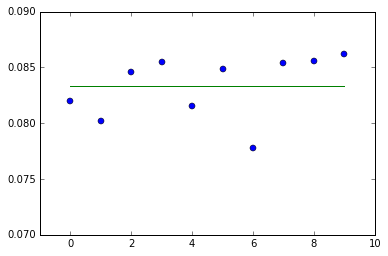

In [35]:
import matplotlib.pyplot as plt
# this next line is only for ipython notebooks:
%matplotlib inline 

plt.figure()
# make some numbers from 0 to 9 as x coordinates:
x = np.arange(0, len(myresults))
# plot simulation results as dots:
plt.plot(x, myresults, 'o')
# and plot the true result as a line:
plt.plot(x, np.ones(len(x))*true_result, '-' )
# and adjust the plotting axes a bit so that the data points at 0 and 9 aren't cut in half:
plt.axis([-1, 10, 0.07, 0.09])

Now we can also define a more standardized way of measuring how large our scatter around the true value is. This is done through the concept of the *standard deviation*.

### Distributions and the standard deviation

Say we have random numbers (or really any sequence of data points):

$x_1, x_2, x_3, x_4, ... x_N$

The **mean** of those data points is defined as:

$\mu = \frac{1}{N} \cdot (x_1 + x_2 + x_3 + ... + x_N)$

And the **standard deviation** of the data from the mean is defined as:

$\sigma = \sqrt{\frac{1}{N} \cdot [(x_1 - \mu)^2  + (x_2 - \mu)^2 + ... +(x_N - \mu)^2]}$

The larger the standard deviation, the larger is the scatter of the data around the mean.

Specifically, for Gaussian (normal) distributions, 68% of the data will be contained in a range of $\pm 1$ standard deviation around the mean.

The blue data set has a smaller standard deviation than the red one:

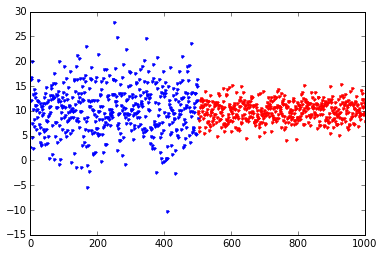

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

set_1 = np.random.normal(10, 5, 500)

set_2 = np.random.normal(10, 2, 500)

plt.figure()
plt.plot(np.arange(0, len(set_1)), set_1, 'b.')
plt.plot(np.arange(len(set_1), len(set_1) + len(set_2)), set_2, 'r.')


So we can now calculate the standard deviation of our 10 Monte Carlo simulation results from above. I won't explicitly write here how to calculate it in Python, because it is part of this week's Assignment for you to write a function that calculates the standard deviation, but the result of that calculationis that our Monte Carlo simulations have a standard deviation of 0.00268. So we can expect that 68% of our individual simulation results will be in the range from 1./12.-0.00268 to 1./12.+0.00268.

### Worksheet materials

There are no extra worksheet materials for this week; all the information you need to solve the exercises of this week's Assignment have been covered in the lectures this week and last week. All the materials are available on the course website:

http://go.qub.ac.uk/phy1024y2016

